<a href="https://colab.research.google.com/github/mohansivasai/Fashion-MNIST/blob/master/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the dependencies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(tf.__version__)

2.2.0-rc2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading the data
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#EDA
print('no of training images = ',x_train.shape)
print('no of testing images = ',x_test.shape)


no of training images =  (60000, 28, 28)
no of testing images =  (10000, 28, 28)


9 0 0 3 

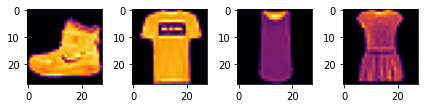

In [4]:
f,ax = plt.subplots(nrows=1,ncols=4)
i = 0
for axes in ax:
  axes.imshow(x_train[i],cmap='inferno')
  print(y_train[i],end=' ')
  i+=1
plt.tight_layout()

In [0]:
x_train =x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255.0

In [15]:
#define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
#compling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
#Callback
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy') > 0.96:
      print('\n reached 96% accuracy so cancellig the training !')
      self.model.stop_training = True
callback = Callback()

In [18]:
#trainging the model
hist = model.fit(x_train,y_train,epochs=10,verbose=1,callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4422 - accuracy: 0.8397
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2965 - accuracy: 0.8916
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2503 - accuracy: 0.9071
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2194 - accuracy: 0.9179
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1928 - accuracy: 0.9271
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1716 - accuracy: 0.9352
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1498 - accuracy: 0.9434
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1338 - accuracy: 0.9508
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1174 - accuracy: 0.9559
Epoch 10/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.1034 - 

In [19]:
#evaluationg the model
pred = model.evaluate(x_test,y_test)
print("loss = {}".format(pred[0]))
print('Accuracy on test set = {}'.format(pred[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.9174
loss = 0.2722153663635254
Accuracy on test set = 0.9174000024795532


Text(0, 0.5, 'loss')

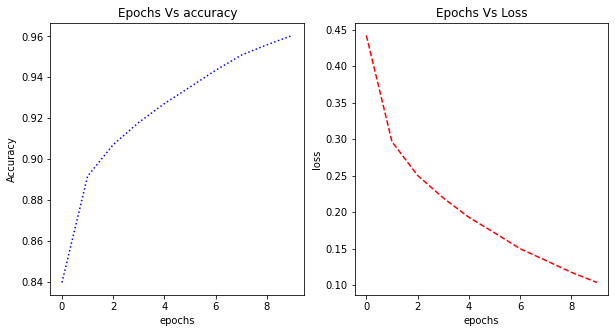

In [21]:
# evaluating the loss and accuracy
acc = hist.history['accuracy']
loss = hist.history['loss']
epochs = hist.epoch
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].plot(epochs,acc,color='blue',ls=':')
ax[0].set_title('Epochs Vs accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Accuracy')
ax[1].plot(epochs,loss,color='red',ls='--')
ax[1].set_title("Epochs Vs Loss")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel("loss")

In [22]:
model.layers

In [24]:
#Visualzing the convolutions
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


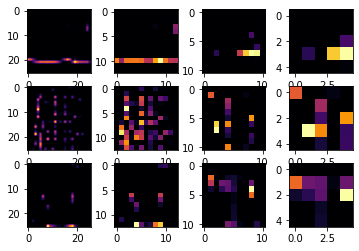

In [41]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
#Note: activation model output consists of list of outputs of different layers,
# the activation-model instance is used i.e This model will include all layers 
#required in the computation of b given a.(go through the Model functinal API-keras)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Miscellanious code

In [28]:
layer_outputs = [layer.output for layer in model.layers]
print(layer_outputs[0])

Tensor("conv2d_4/Identity:0", shape=(None, 26, 26, 64), dtype=float32)


In [0]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)